using zero order production and first order degradation, at r=0.005, both spatiocyte and egfrd agrees with ode mean=5. at r=0.05, egfrd result is 2% lower than ode mean while spatiocyte agrees.

radius 0.05
ode
av=1.0,intrinsic=False
kon=0.1,koff=0.02,kd=0.251,keff=0.02,kfactor=0.0865
spa
av=1.66,intrinsic=True
kon=0.0601,koff=0.0383,kd=0.251,keff=0.0333,kfactor=0.153
egfrd
av=1.0,intrinsic=True
kon=0.1,koff=0.0217,kd=0.251,keff=0.02,kfactor=0.0865


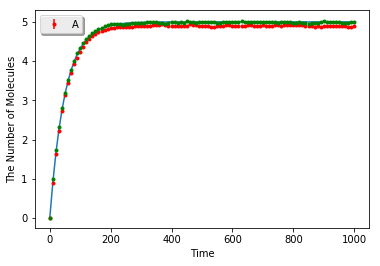

spamean 4.99164117647
egfrdmean 4.90058235294
radius 0.005
ode
av=1.0,intrinsic=False
kon=0.1,koff=0.02,kd=0.0251,keff=0.02,kfactor=3.9
spa
av=1.04,intrinsic=True
kon=0.0964,koff=0.119,kd=0.0251,keff=0.0207,kfactor=4.73
egfrd
av=1.0,intrinsic=True
kon=0.1,koff=0.0979,kd=0.0251,keff=0.02,kfactor=3.9


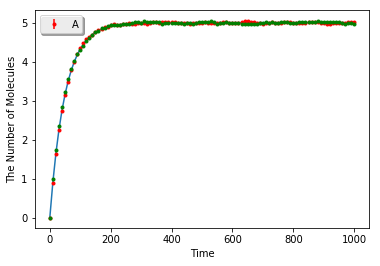

spamean 5.00001960784
egfrdmean 4.99981764706


In [2]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

simrun=10000
duration = 1000
#rm = 0.005
D=0.1
Nas = 5
nproc=None
L=1#cbrt(10)
k0= 0.1
koff=0.02
method='multiprocessing'

for rm in [0.05,0.005]:
    print('radius',rm)
    def write(name,obs):
        try:
            f=open(name,'w')
            data = np.array(obs.data()).T
            np.savetxt(name,np.column_stack([data[0],data[1]]),delimiter=',',fmt='%s')
            f.close()        
            print('saving into',name)        
            e=open(name+'_err','w')        
            err = np.array(obs.error()).T        
            np.savetxt(name+'_err',np.column_stack([err[0],err[1]]),delimiter=',',fmt='%s')
            e.close()
            print('saving into',name+'_err')
        except AttributeError:
            print('no error')

    def singlerun(solver='ode',intrinsic=False,simrun=1):   
        print(solver)
        V = L**3 
        M = max(int(min(cbrt(Nas), L / (2 * rm))), 3)
        if solver=='spa':
            solver=("spatiocyte",rm)
            V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)
        elif solver=='egfrd':
            solver = ('egfrd', Integer3(M, M, M)) 

        kon=k0/V        
        keff = kon*V*V/Nas
        kd = 4*np.pi*rm*2*D*2
        ka = keff*kd/(kd-keff)
        assert(ka>0)
        with species_attributes():
            A | {'D': 0, 'radius':rm}
            #B | {'D': D, 'radius':rm}

        with reaction_rules():
            ~A > A | kon
            #A + B >B | (ka if intrinsic else keff)
            A  > ~A | koff
        m = get_model()

        print('av={:.3},intrinsic={}'.format(float(V),intrinsic))
        print('kon={:.3},koff={:.3},kd={:.3},keff={:.3},kfactor={:.3}'.format(kon,(ka if intrinsic else keff),kd,keff,ka/kd))
        if simrun >1    :
            obs=ensemble.ensemble_simulations(duration,n=simrun, model=m, solver=solver,volume=ones()*L,species_list=["A"],return_type='observer',nproc=nproc,method=method)#,return_type="observer")
        else:
            obs=run_simulation(duration,model=m,return_type='observer',species_list=['A'],solver=solver,volume=ones()*L)
        return obs

    obs1=singlerun('ode',False,1)
    obs2=singlerun('spa',True,simrun)
    obs3=singlerun('egfrd',True,simrun)
    #obs4=singlerun('gillespie',False,simrun)
    #write('/home/chew/outputdata/sturrock_bd_ode_rm{:.3}_Nas5'.format(rm),obs1)
    #write('/home/chew/outputdata/sturrock_bd_spa_rm{:.3}_Nas5_10k'.format(rm),obs2)
    #write('/home/chew/outputdata/sturrock_bd_egfrd_rm{:.3}_Nas5_10k'.format(rm),obs3)
    viz.plot_number_observer(obs3,'r.',obs2,'g.',obs1,'k-')#,obs3,'k-')
    data2 = np.array(obs2.data()).T
    data3 = np.array(obs3.data()).T
    print('spamean',np.mean(data2[1][50:]))
    print('egfrdmean',np.mean(data3[1][50:]))

after fixing egfrd production code

radius 0.05
ode
av=1.0,intrinsic=False
kon=0.1,koff=0.02,kd=0.251,keff=0.02,kfactor=0.0865
spa
av=1.66,intrinsic=True
kon=0.0601,koff=0.0383,kd=0.251,keff=0.0333,kfactor=0.153
egfrd
av=1.0,intrinsic=True
kon=0.1,koff=0.0217,kd=0.251,keff=0.02,kfactor=0.0865


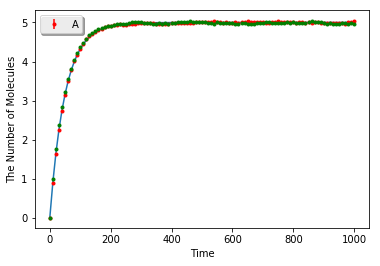

spamean 4.98840784314
egfrdmean 5.00464117647
radius 0.005
ode
av=1.0,intrinsic=False
kon=0.1,koff=0.02,kd=0.0251,keff=0.02,kfactor=3.9
spa
av=1.04,intrinsic=True
kon=0.0964,koff=0.119,kd=0.0251,keff=0.0207,kfactor=4.73
egfrd
av=1.0,intrinsic=True
kon=0.1,koff=0.0979,kd=0.0251,keff=0.02,kfactor=3.9


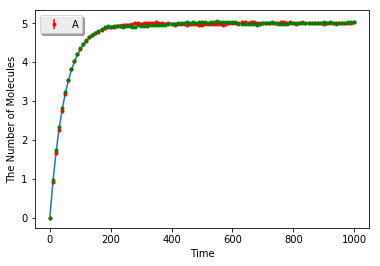

spamean 5.00749411765
egfrdmean 5.00170980392


In [3]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

simrun=10000
duration = 1000
#rm = 0.005
D=0.1
Nas = 5
nproc=None
L=1#cbrt(10)
k0= 0.1
koff=0.02
method='multiprocessing'

for rm in [0.05,0.005]:
    print('radius',rm)
    def write(name,obs):
        try:
            f=open(name,'w')
            data = np.array(obs.data()).T
            np.savetxt(name,np.column_stack([data[0],data[1]]),delimiter=',',fmt='%s')
            f.close()        
            print('saving into',name)        
            e=open(name+'_err','w')        
            err = np.array(obs.error()).T        
            np.savetxt(name+'_err',np.column_stack([err[0],err[1]]),delimiter=',',fmt='%s')
            e.close()
            print('saving into',name+'_err')
        except AttributeError:
            print('no error')

    def singlerun(solver='ode',intrinsic=False,simrun=1):   
        print(solver)
        V = L**3 
        M = max(int(min(cbrt(Nas), L / (2 * rm))), 3)
        if solver=='spa':
            solver=("spatiocyte",rm)
            V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)
        elif solver=='egfrd':
            solver = ('egfrd', Integer3(M, M, M)) 

        kon=k0/V        
        keff = kon*V*V/Nas
        kd = 4*np.pi*rm*2*D*2
        ka = keff*kd/(kd-keff)
        assert(ka>0)
        with species_attributes():
            A | {'D': 0, 'radius':rm}
            #B | {'D': D, 'radius':rm}

        with reaction_rules():
            ~A > A | kon
            #A + B >B | (ka if intrinsic else keff)
            A  > ~A | koff
        m = get_model()

        print('av={:.3},intrinsic={}'.format(float(V),intrinsic))
        print('kon={:.3},koff={:.3},kd={:.3},keff={:.3},kfactor={:.3}'.format(kon,(ka if intrinsic else keff),kd,keff,ka/kd))
        if simrun >1    :
            obs=ensemble.ensemble_simulations(duration,n=simrun, model=m, solver=solver,volume=ones()*L,species_list=["A"],return_type='observer',nproc=nproc,method=method)#,return_type="observer")
        else:
            obs=run_simulation(duration,model=m,return_type='observer',species_list=['A'],solver=solver,volume=ones()*L)
        return obs

    obs1=singlerun('ode',False,1)
    obs2=singlerun('spa',True,simrun)
    obs3=singlerun('egfrd',True,simrun)
    #obs4=singlerun('gillespie',False,simrun)
    #write('/home/chew/outputdata/sturrock_bd_ode_rm{:.3}_Nas5'.format(rm),obs1)
    #write('/home/chew/outputdata/sturrock_bd_spa_rm{:.3}_Nas5_10k'.format(rm),obs2)
    #write('/home/chew/outputdata/sturrock_bd_egfrd_rm{:.3}_Nas5_10k'.format(rm),obs3)
    viz.plot_number_observer(obs3,'r.',obs2,'g.',obs1,'k-')#,obs3,'k-')
    data2 = np.array(obs2.data()).T
    data3 = np.array(obs3.data()).T
    print('spamean',np.mean(data2[1][50:]))
    print('egfrdmean',np.mean(data3[1][50:]))